In [1]:
import ROOT
from ROOT import gStyle

Welcome to JupyROOT 6.26/08


In [2]:
myFile_bkg = ROOT.TFile.Open("/Users/bertabeltran/muon_data/data/wls/June5_amp_WavelengthShifter_FreeWrites_ListOnly_Background/FILTERED/HcompassF_June5_amp_WavelengthShifter_FreeWrites_ListOnly_Background_20230606_102516.root")

In [3]:
myFile_bkg.ls()

TFile**		/Users/bertabeltran/muon_data/data/wls/June5_amp_WavelengthShifter_FreeWrites_ListOnly_Background/FILTERED/HcompassF_June5_amp_WavelengthShifter_FreeWrites_ListOnly_Background_20230606_102516.root	
 TFile*		/Users/bertabeltran/muon_data/data/wls/June5_amp_WavelengthShifter_FreeWrites_ListOnly_Background/FILTERED/HcompassF_June5_amp_WavelengthShifter_FreeWrites_ListOnly_Background_20230606_102516.root	
  KEY: TDirectoryFile	Energy;1	Energy
  KEY: TDirectoryFile	Time;1	Time
  KEY: TDirectoryFile	PSD;1	PSD
  KEY: TDirectoryFile	PSD_E;1	PSD_E
  KEY: TTime	RealTime_0;1	object title
  KEY: TTime	LiveTime_0;1	object title
  KEY: TTime	RealTime_1;1	object title
  KEY: TTime	LiveTime_1;1	object title
  KEY: TTime	RealTime_2;1	object title
  KEY: TTime	LiveTime_2;1	object title


In [4]:
dir_bkg = myFile_bkg.GetDirectory("PSD");

In [5]:
dir_bkg.ls()

TDirectoryFile*		PSD	PSD
 KEY: TH1D	_F_PSDCH0@DT5751_1615;1	
 KEY: TH1D	_F_PSDCH1@DT5751_1615;1	
 KEY: TH1D	_F_PSDCH2@DT5751_1615;1	


In [14]:
hist_bkg = dir_bkg.Get("_F_PSDCH2@DT5751_1615")

In [15]:
myFile_coin = ROOT.TFile.Open("/Users/bertabeltran/muon_data/data/wls/June2_amp_WavelengthShifter_FreeWrites_ListOnly_biggerInt_wiindow/FILTERED/HcompassF_June2_amp_WavelengthShifter_FreeWrites_ListOnly_biggerInt_wiindow_20230605_113152.root")
dir_coin = myFile_coin.GetDirectory("PSD");
dir_coin.ls()
hist_coin = dir_coin.Get("_F_PSDCH2@DT5751_1615")

TDirectoryFile*		PSD	PSD
 KEY: TH1D	_F_PSDCH0@DT5751_1615;1	
 KEY: TH1D	_F_PSDCH1@DT5751_1615;1	
 KEY: TH1D	_F_PSDCH2@DT5751_1615;1	


Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName
Info in <TCanvas::Print>: png file /Users/bertabeltran/muon_data/data/wls/Chan2_PSD.png has been created


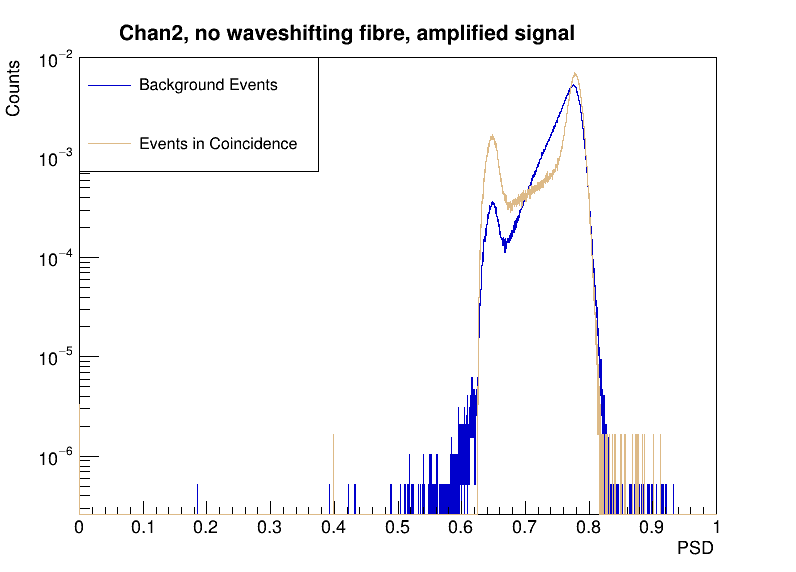

In [16]:

c = ROOT.TCanvas("myCanvasName","Scintillator with waveshifting fibre",800,600)
#hist_bkg.Rebin(4)
#hist_coin.Rebin(4)
hist_bkg.SetFillColor(0)
#hist_bkg.GetYaxis().SetRangeUser(0, 0.05)
hist_bkg.SetNormFactor(1)
hist_bkg.Draw()
hist_bkg.GetYaxis().SetTitleOffset(1.5) #1.2

hist_coin.SetLineColor(42)
hist_coin.SetFillColor(0)
hist_coin.SetNormFactor(1)
hist_coin.Draw("same")
c.SetLogy()
gStyle.SetOptStat(0)

leg = ROOT.TLegend(.1,.7,.4,.9)
leg.AddEntry(hist_bkg,"Background Events","L")
leg.AddEntry(hist_coin,"Events in Coincidence","L")
leg.Draw()

tex=ROOT.TLatex(0.15,0.93,"Chan2, no waveshifting fibre, amplified signal");
tex.SetNDC();
tex.SetTextSize(0.04);
tex.Draw();

c.Draw()
c.SaveAs("/Users/bertabeltran/muon_data/data/wls/Chan2_PSD.png");